In [6]:
 import pandas as pd

In [7]:
import numpy as np

In [8]:
####Random sampling

In [9]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [10]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
 df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [12]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [13]:
# replace nan value 

In [14]:
df['Age'].dropna().sample()

682    20.0
Name: Age, dtype: float64

In [15]:
df['Age'].isnull().index

RangeIndex(start=0, stop=891, step=1)

In [16]:
df['Age'].isnull().sum()

177

In [17]:
# create random values
#sample(df['Age'].isnull().sum(),random_state=0) it is randomly putting some values inthe nan values
#if we remove random_state=0 it will change the values when ever we run it
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [18]:
def impute_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)
    df[variable+'_random']=df[variable]
    # it will have the random same to fill the nan value
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)    
    #pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [19]:
median=df.Age.median()

In [20]:
median

28.0

In [21]:
impute_nan(df,'Age',median)

In [22]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [23]:
# difference between iloc and loc

In [24]:
import matplotlib.pyplot as plt

In [25]:
%matplotlib inline

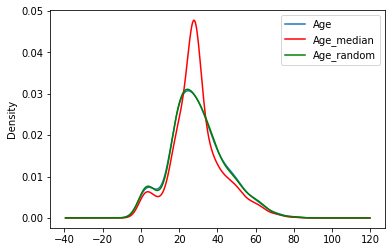

In [26]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [27]:
#### Capturing NAN values with a new feature

In [28]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [29]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [30]:
df["Age_NaN"]=np.where(df['Age'].isnull(),1,0)

In [31]:
df.head(20)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [32]:
df.Age.median()

28.0

In [35]:
df.Age.fillna(df.Age.median(),inplace=True)

In [36]:
df.head(20)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [37]:
### end of distribution imputation

In [52]:
data=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [53]:
data.head(10)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


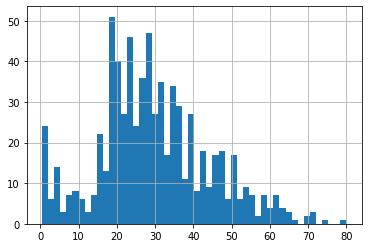

In [54]:
data.Age.hist(bins=50)

In [55]:
#we will take the far end of this that is end of the distribution and fill the value w.r.t that

In [56]:
# we will take the data after the third normal distribution
extreme=data.Age.mean()+3*data.Age.std()

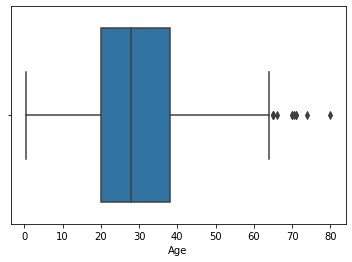

In [57]:
import seaborn as sns
sns.boxplot('Age',data=data)

In [58]:
median

28.0

In [59]:
def impute_nan(data,variable,median,extreme):
    data[variable+"_end_distribution"]=data[variable].fillna(extreme)
    data[variable].fillna(median,inplace=True)

In [60]:
impute_nan(data,'Age',data.Age.median(),extreme)

In [61]:
data.head(10)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


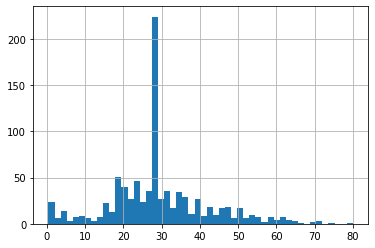

In [62]:
data['Age'].hist(bins=50)

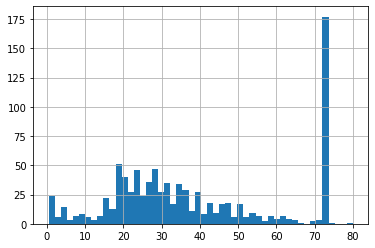

In [63]:
data.Age_end_distribution.hist(bins=50)

In [ ]:
data.head(10)

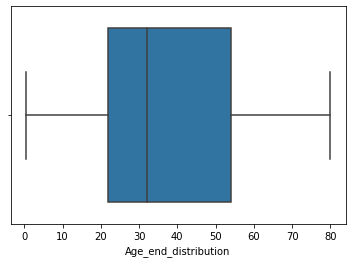

In [64]:
sns.boxplot('Age_end_distribution', data=data)

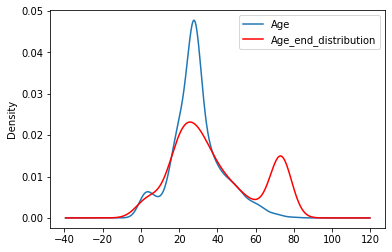

In [65]:
fig=plt.figure()
ax=fig.add_subplot(111)
data['Age'].plot(kind='kde', ax=ax)
data.Age_end_distribution.plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [87]:

x=np.arange(
x

array([0, 1, 2])

In [90]:
np.zeros(3,4)

TypeError: data type not understood